# Pandas

### GitHub repository: https://github.com/jorgemauricio/curso_itesm

### Instructor: Jorge Mauricio

### Base de datos: Stanford Open Policing Project ([Montana](https://openpolicing.stanford.edu/data)) 

In [5]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# leer csv
df = pd.read_csv("data/Montana.csv", low_memory=False)

In [7]:
# estructura del dataFrame Montana
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
0,MT-2009-00001,MT,2009-01-01,02:10,CASCADE,Cascade County,30013.0,US 89 N MM10 (SB),NaN,F,...,-111.802932,N,NaN,False,1994,FORD,EXPLORER,SPORT UTILITY,NaN,"TRAFFIC CITATION,WARNING"
1,MT-2009-00002,MT,2009-01-02,11:34,MISSOULA,Missoula County,30063.0,HWY 93 SO AND ANNS LANE S/B,NaN,M,...,-114.081142,N,NaN,False,1996,GMC,TK,TRUCK,NaN,"INFFRACTION ARREST,WARNING"
2,MT-2009-00003,MT,2009-01-03,11:36,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 N/B,NaN,M,...,-114.073505,N,NaN,False,1999,GMC,YUKON,SPORT UTILITY,NaN,INFFRACTION ARREST
3,MT-2009-00004,MT,2009-01-04,10:33,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 S/B,NaN,F,...,-114.079027,NaN,NaN,False,2002,HOND,CR-V,SPORT UTILITY,NaN,INFFRACTION ARREST
4,MT-2009-00005,MT,2009-01-04,10:46,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 N/B,NaN,M,...,-114.079150,NaN,NaN,False,1992,TOYT,TERCEL,SEDAN,NaN,INFFRACTION ARREST


In [8]:
# cantidad de columnas y filas
df.shape

(825118, 33)

In [9]:
# tipos de datos de cada columna
df.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department        float64
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found          object
stop_outcome              object
is_arrested                 bool
lat                      float64
lon                      float64
ethnicity                 object
city                      object
out_of_state              object
vehicle_year              object
vehicle_make              object
vehicle_model             object
vehicle_st

In [10]:
# contabilizar los valores nulos
df.isnull().sum()

id                            0
state                         0
stop_date                    11
stop_time                    11
location_raw                  4
county_name                4056
county_fips                4056
fine_grained_location      3741
police_department        825118
driver_gender               119
driver_age_raw                0
driver_age                 3480
driver_race_raw             106
driver_race                2739
violation_raw                73
violation                    73
search_conducted              0
search_type_raw          822092
search_type              822092
contraband_found           3026
stop_outcome                 53
is_arrested                   0
lat                         436
lon                         436
ethnicity                    98
city                     549630
out_of_state               4699
vehicle_year               6610
vehicle_make               4268
vehicle_model             23805
vehicle_style             65362
search_r

## Remover columnas que solo contienen valores nulos

In [11]:
# eliminar la columna de "police_department"
df.drop("police_department", axis="columns", inplace=True)

In [12]:
# contabilizar columnas y filas
df.shape

(825118, 32)

In [13]:
# checar columnas
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'lat',
       'lon', 'ethnicity', 'city', 'out_of_state', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'vehicle_style', 'search_reason',
       'stop_outcome_raw'],
      dtype='object')

In [14]:
# método alternativo
df.dropna(axis='columns', how='all').shape

(825118, 32)

NOTA: 
- Existe más de una forma de eliminar datos nulos
- Verificar los argumentos de cada método

## ¿Qué género tiene un mayor número de detenciones por exceso de velocidad?

In [15]:
# Número de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'Speeding']["driver_gender"].value_counts()

M    225327
F    111598
Name: driver_gender, dtype: int64

In [16]:
# Porcentaje de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'Speeding']["driver_gender"].value_counts(normalize=True)

M    0.668775
F    0.331225
Name: driver_gender, dtype: float64

In [17]:
# forma alternativa
df.loc[df["violation"] == 'Speeding', "driver_gender"].value_counts(normalize=True)

M    0.668775
F    0.331225
Name: driver_gender, dtype: float64

In [18]:
# cuando un hombre es detenido, que porcentaje es por exceso de velocidad?
df[df['driver_gender'] == "M"]["violation"].value_counts(normalize=True)

Speeding                                                0.404612
License,Speeding                                        0.066251
Paperwork,Speeding                                      0.053619
Lights                                                  0.050501
License,Paperwork,Speeding                              0.032053
Safe movement                                           0.031704
License                                                 0.024793
Seat belt,Speeding                                      0.021553
Registration/plates                                     0.018569
License,Lights                                          0.014628
Truck                                                   0.012943
Stop sign/light                                         0.012774
Other                                                   0.011884
License,Paperwork                                       0.011009
Lights,Paperwork                                        0.009154
Equipment,Speeding       

In [19]:
# cuando una mujer es detenida, que porcentaje es por exceso de velocidad?
df[df['driver_gender'] == "F"]["violation"].value_counts(normalize=True)

Speeding                                             0.416364
License,Speeding                                     0.080838
Paperwork,Speeding                                   0.062131
Lights                                               0.054774
License,Paperwork,Speeding                           0.040507
Safe movement                                        0.031616
License                                              0.025337
Registration/plates                                  0.021061
Seat belt,Speeding                                   0.016674
License,Lights                                       0.016021
Stop sign/light                                      0.015383
License,Paperwork                                    0.013107
Lights,Paperwork                                     0.010626
License,Lights,Paperwork                             0.009659
Other                                                0.009301
Paperwork,Seat belt,Speeding                         0.007208
License,

In [20]:
# porcentaje agrupado por genero
df.groupby("driver_gender")["violation"].value_counts(normalize=True)

driver_gender  violation                                           
F              Speeding                                                0.416364
               License,Speeding                                        0.080838
               Paperwork,Speeding                                      0.062131
               Lights                                                  0.054774
               License,Paperwork,Speeding                              0.040507
               Safe movement                                           0.031616
               License                                                 0.025337
               Registration/plates                                     0.021061
               Seat belt,Speeding                                      0.016674
               License,Lights                                          0.016021
               Stop sign/light                                         0.015383
               License,Paperwork                    

In [21]:
# año con el número mayor de detenciones
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'lat',
       'lon', 'ethnicity', 'city', 'out_of_state', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'vehicle_style', 'search_reason',
       'stop_outcome_raw'],
      dtype='object')

In [22]:
# combinar celdas de fecha y tiempo
combined = df["stop_date"] + " " + df['stop_time']

In [23]:
# convertir a columna de tiempo
df['fecha'] = pd.to_datetime(combined)

In [24]:
# corroborar tipo de dato de la columna
df.dtypes

id                               object
state                            object
stop_date                        object
stop_time                        object
location_raw                     object
county_name                      object
county_fips                     float64
fine_grained_location            object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                   bool
search_type_raw                  object
search_type                      object
contraband_found                 object
stop_outcome                     object
is_arrested                        bool
lat                             float64
lon                             float64
ethnicity                        object
city                             object


In [25]:
# año con mayor número de detenciones
df['fecha'].dt.year.value_counts()

2010.0    124285
2011.0    122839
2012.0    117487
2015.0    115935
2013.0    114283
2014.0    109747
2016.0    102097
2009.0     18434
Name: fecha, dtype: int64

In [26]:
# mes con mayor número de detenciones del 2010
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts()

9     13137
8     12421
7     12271
5     11953
10    11791
3     10650
6     10568
4     10279
2      9084
11     7882
1      7321
12     6928
Name: fecha, dtype: int64

In [27]:
# ordenar datos por índice
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index()

1      7321
2      9084
3     10650
4     10279
5     11953
6     10568
7     12271
8     12421
9     13137
10    11791
11     7882
12     6928
Name: fecha, dtype: int64

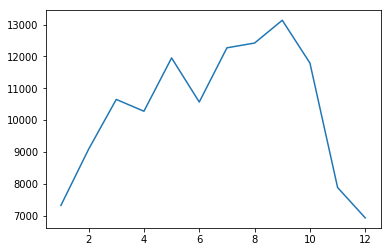

In [28]:
# gráficar los datos (línea)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot()

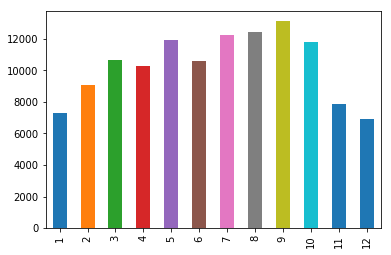

In [29]:
# gráficar los datos (barra)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="bar")

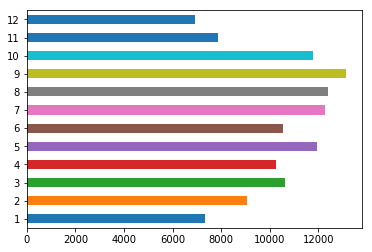

In [30]:
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

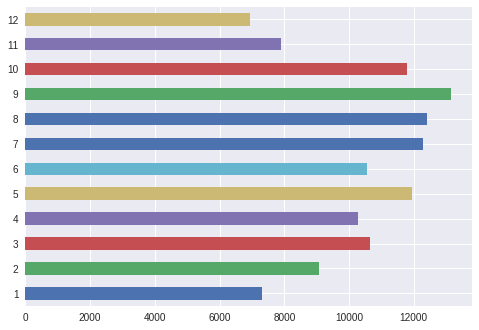

In [31]:
# aplicando estilo
plt.style.use("seaborn")
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

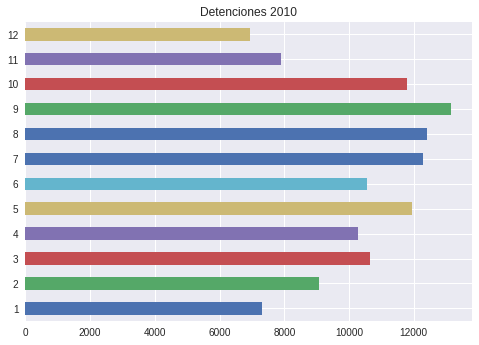

In [32]:
# gráficar los datos (barra y título)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh", title="Detenciones 2010")

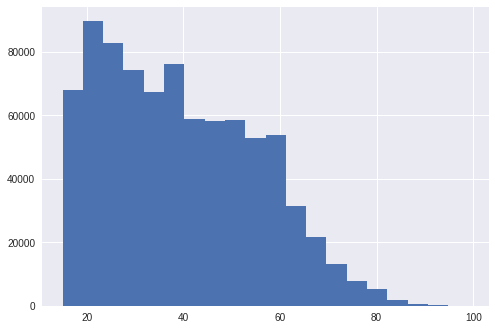

In [33]:
# histograma de edades
df['driver_age'].hist(bins=20)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825118 entries, 0 to 825117
Data columns (total 33 columns):
id                       825118 non-null object
state                    825118 non-null object
stop_date                825107 non-null object
stop_time                825107 non-null object
location_raw             825114 non-null object
county_name              821062 non-null object
county_fips              821062 non-null float64
fine_grained_location    821377 non-null object
driver_gender            824999 non-null object
driver_age_raw           825118 non-null float64
driver_age               821638 non-null float64
driver_race_raw          825012 non-null object
driver_race              822379 non-null object
violation_raw            825045 non-null object
violation                825045 non-null object
search_conducted         825118 non-null bool
search_type_raw          3026 non-null object
search_type              3026 non-null object
contraband_found         822